# Semesterarbeit Teil 3 – Clusteranalyse

## Einführung
Im Rahmen der Lernleistung 3 des Moduls soll ausgehend von einem ausgewählten englischen Wikipedia-Artikels eine Datenbasis an Artikeln und Links heruntergeladen werden. Dabei solle die Breitensuche verwendet werden und alle Spezialseiten der Wikipedia ignoriert werden.
Die Anzahl der heruntergeladenen Artikel sollte nicht mehr als 50 betragen.
Um das Ganze zu clusterten und zu analysieren, muss k-Means  Clustering Algorithmus auf der Datenbasis verwendet werden. 


## Theorie
### Unüberwachten Lernen mit Clustering
Was ist eigentlich genau unüberwachtes Lernen? Beim unüberwachten Lernen haben wir es mit nicht mit gekennzeichneten Daten zu tun, die möglichen Antworten/Ergebnisse sind uns gänzlich unbekannt. Folglich können wir den Algorithmus nicht trainieren, indem wir ihm die Ergebnisse, auf die er kommen soll, im Rahmen einer Trainingsphase vorgeben (überwachtes Lernen), sondern wir nutzen Algorithmen, die die Struktur der Daten erkunden und für uns Menschen sinnvolle Informationen aus Ihnen bilden.
![Unüberwachtes Lernen - Prozess-Modell](ueberwachtes-maschinelles-lernen-prozess-modell.png)
Unüberwachte Methoden des maschinellen Lernens werden für das Data Mining eingesetzt, also das Erkennen von Inhalten in Daten anhand von sichtbar werdenden Strukturen. Die Methoden müssen nicht zwangsläufig mit Datenvisualisierung arbeiten, aber oft tun sie das, denn es sind die visuellen Strukturen, die es unserem menschlichen Gehirn ermöglichen, die Daten in einen Kontext zu setzen. Mir sind zwei Kategorien des unüberwachten Lernens bekannt, zum einen das Clustering, das im Grunde ein unüberwachtes Klassifikationsverfahren ist, und zum anderen die Dimensionalitätsreduktion PCA (Hauptkomponentenanalyse). 
[4] In dieser Arbeit werde ich mich aber mit Clustering beschäftigen.

### Typen von Clustering
Es gibt 4 Typen von Clustering:
* Zentroiden-Clustering (K-means)
* Dichte-Clustering
* Verteilungs-Clustering
* Konnektivitäts-Clustering (Hierachical Clustering)

### K-means-Algorithmus

Der erste Schritt bei der Verwendung von k-means Clustering ist die Angabe der Anzahl von Clustern (k), die in der endgültigen Lösung erzeugt werden. Der Algorithmus beginnt mit der zufälligen Auswahl von k Objekten aus dem Datensatz, die als Anfangszentren für die Cluster dienen. Die ausgewählten Objekte werden auch als Clustermittelpunkte oder Zentroide bezeichnet. Als Nächstes wird jedes der verbleibenden Objekte dem nächstgelegenen Zentroid zugewiesen, wobei "nächstgelegen" über den euklidischen Abstand zwischen dem Objekt und dem Cluster-Mittelwert definiert ist. Dieser Schritt wird "Clusterzuweisungsschritt" genannt. Nach dem Zuweisungsschritt berechnet der Algorithmus den neuen Mittelwert eines jeden Clusters. Dieser Schritt wird mit dem Begriff Cluster-"Zentrenaktualisierung" bezeichnet. Nachdem nun die Zentren neu berechnet wurden, wird jede Beobachtung erneut daraufhin überprüft, ob sie möglicherweise näher an einem anderen Cluster liegt. Alle Objekte werden mit den aktualisierten Cluster-mittel neu zugeordnet. Die Schritte der Clusterzuordnung und der Zentroid-Aktualisierung werden iterativ wiederholt, bis sich die Clusterzuordnungen nicht mehr ändern (d. h. bis Konvergenz erreicht ist). Das heisst, die in der aktuellen Iteration gebildeten Cluster sind die gleichen wie die in der vorherigen Iteration erhaltenen. [5]

Die Grundidee des k-means Clustering besteht darin, Cluster so zu definieren, dass die gesamte Intra-Cluster-Variation (bekannt als Gesamtvariation innerhalb von Clustern) minimiert wird. Es sind mehrere k-means-Algorithmen verfügbar. Der Standardalgorithmus ist der Hartigan-Wong-Algorithmus (1979), der die gesamte Variation innerhalb von Clustern als die Summe der quadrierten euklidischen Abstände zwischen Elementen und dem entsprechenden Zentroid definiert:
* $W(C_k) = \sum_{x_i \in C_k}(x_i - \mu_k)^2 $
* $x_i$ ein Datenpunkt ist, der zum Cluster gehört $C_k$
* $\mu_k$ ist der Mittelwert der dem Cluster zugeordneten Punkte $C_k$

Jede Beobachtung $x_i$ wird einem gegebenen Cluster so zugeordnet, dass die Summe der Quadrate (SS) des Abstands der Beobachtung zu ihren zugeordneten Clusterzentren $\mu_k$ minimiert wird.

Die gesamte Variation wird wie folgt innerhalb von Clustern definiert:

Total der Quandratsummen = $\sum^k_{k=1}W(C_k)$ = $\sum^k_{k=1}$$\sum_{x_i \in C_k}(x_i - \mu_k)^2$

Total der Quadratsummen innerhalb von Clustern misst die Kompaktheit des Clusters und soll so klein wie möglich sein.

Der K-means-Algorithmus lässt sich wie folgt zusammenfassen:

1. Anzahl der zu erstellenden Cluster (K) angeben
2. Auswählen eines zufällig k Objektes aus dem Datensatz als anfängliche Clusterzentren oder Mittelwerte
3. Weist jede Beobachtung ihrem nächstgelegenen Zentroid zu, basierend auf dem euklidischen Abstand zwischen dem Objekt und dem Zentroid
4. Aktualisieren für jeden der k Cluster den Clusterschwerpunkt, indem die neuen Mittelwerte aller Datenpunkte im Cluster berechnen. Der Zentroid eines K-ten Clusters ist ein Vektor der Länge p, der die Mittelwerte aller Variablen für die Beobachtungen im k-ten Cluster enthält; p ist die Anzahl der Variablen.
5. Iterativ minimieren der Summe innerhalb der Quadratsumme. Das heisst, die Schritte 3 und 4 werden iteriert, bis sich die Clusterzuordnungen nicht mehr ändern oder die maximale Anzahl der Iterationen erreicht ist.

#### Clustering-Distanzmasse
Die Klassifizierung von Beobachtungen in Clusters erfordert einige Methoden zur Berechnung des Abstands oder der (Un-)Ähnlichkeit
zwischen jedem Paar von Beobachtungen.
Das Ergebnis dieser Berechnung wird als Dissimilaritäts- oder Distanzmatrix bezeichnet.
Es gibt viele Methoden zur Berechnung dieser Abstandsinformation.
Die Wahl der Abstandsmasse ist ein kritischer Schritt bei der Clusterbildung.
Sie definiert, wie die Ähnlichkeit zweier Elemente (x, y) berechnet wird, und beeinflusst die Form der Cluster.
Die klassischen Methoden für Distanzmasse sind Euklidische und Manhattan-Distanzen, die wie folgt, definiert sind:

***Euklidische Distanz:***

$ d_{euc}(x,y) = \sqrt{\sum^n_{i=1}(x_i - y_i)^2}$

***Manhattan Distanz***

$d_{man}(x,y) = \sum^n_{i=1}|(x_i - y_i)| $

Nun möchten wir anhand der Untersuchung diesen K-Means Algoithmus answenden und damit meine Clusters berechnen. Doch wie kann ich diesen Algorithmus anwenden? Gibt es hier Libraries, welche ich verwenden kann?

In [68]:
import requests
from bs4 import BeautifulSoup # parsing HTML
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import sys
import os
from sklearn import preprocessing
from scipy.sparse import csr_matrix

%matplotlib inline

In [69]:
url = 'https://en.wikipedia.org/wiki/Zurich_Cantonal_Bank'
    
index = requests.get(url).text
soup_index = BeautifulSoup(index, 'html.parser')
# Find the links on the page
dumps = [a['href'] for a in soup_index.find_all('a') if a.has_attr('href')]

In [70]:
r = re.compile('.*wiki.*')
data = list(filter(r.match, dumps)) # filter only wikipedia links
df = list(dict.fromkeys(data)) # Remove duplicates
print(df[:5])
print('==========================================')
print('No links: ', len(dumps))
print('==========================================')
print('After removed duplicates: ', len(df))

['https://de.wikipedia.org/wiki/Z%C3%BCrcher_Kantonalbank', 'https://translate.google.com/translate?&u=https%3A%2F%2Fde.wikipedia.org%2Fwiki%2FZ%C3%BCrcher_Kantonalbank&sl=de&tl=en&prev=_t&hl=en', '/wiki/Template:Expand_German#Topics_and_categorization', '/wiki/Category:Articles_needing_translation_from_German_Wikipedia', '/wiki/Wikipedia:Copying_within_Wikipedia']
No links:  252
After removed duplicates:  163


Hier sollten nur die ersten 50 Links verwendet werden.

Da k-means nur mit numerischen Werten umgehen kann, wird der TF-IDF Vektorisierer verwendet. 

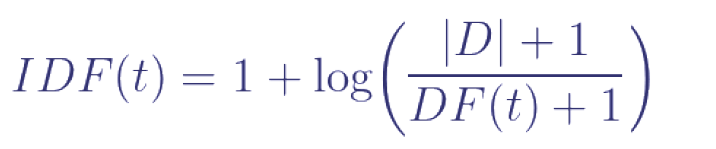

Inverse Dokumenthäufigkeit. |D| ist die Gesamtzahl aller Dokumente, t ist der Begriff, und DF(t)
ist die Anzahl aller Dokumente, die den Begriff enthalten. Je niedriger die Zahl ist, desto unbedeutender ist der Begriff,
und je höher, desto mehr sollte ein Begriff in einer Abfrage für die Relevanzbewertung zählen.

In [88]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df[:50])

In [89]:
kmeans = KMeans(n_clusters=7, random_state=0).fit(X)

In [90]:
np.set_printoptions(threshold=sys.maxsize)
labels2=kmeans.labels_

In [91]:
n_cluster = range(1, 20)

In [92]:
inertias = [] 

K = range(1,20) 

  
for k in K: 
    #Aufbau und Anpassung des Modells nd fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(X) 
    inertias.append(kmeanModel.inertia_)

print ("Inertias: ",inertias)

Inertias:  [46.53487170522692, 44.92674555336672, 43.21717529864838, 42.22731616723356, 41.32508975885605, 39.72249850999503, 38.82109919487694, 37.87578543613544, 36.88665339678578, 35.94137169238268, 34.996089987979595, 34.0508082835765, 33.105526579173414, 32.160244874770335, 31.214963170367245, 30.26968146596416, 29.324399761561075, 28.379118057157992, 27.433836352754902]


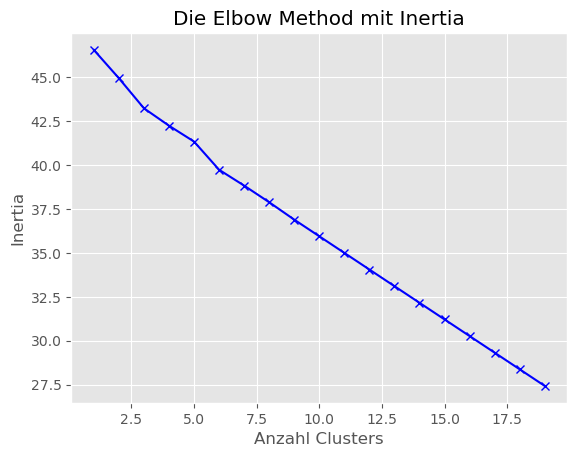

In [93]:
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Anzahl Clusters') 
plt.ylabel('Inertia') 
plt.title('Die Elbow Method mit Inertia') 
plt.show() 

Hier erkennt man gut, dass man somit zwischen 4 und 3 Clusters gebraucht. Ab dem 4 ändert nichts mehr gross.
Nun zur Hauptkomponentenanalyse, welche ein mathematisches Verfahren ist und zur Dimensionalitätsreduktion führt.
Das Ziel ist es, die Anzahl der Merkmale zu reduzieren, während der Grossteil der ursprünglichen Informationen erhalten bleibt.
Nun werde ich alle Daten mittels PCA zur Visualisierung der Cluster transformieren.

Recommended number of clusters:  6


Text(0, 0.5, 'n')

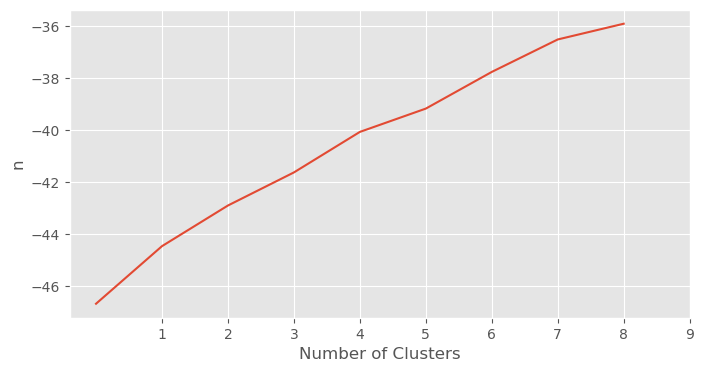

In [76]:
kmeans = [KMeans(n_clusters=i).fit(X) for i in n_cluster]

scores = [kmeans[i].score(X) for i in range(len(kmeans))]
scores = np.array(scores)
dif_scores = scores / scores[0]
dif_scores = np.diff(dif_scores)
n_clusters = np.argwhere(dif_scores < np.quantile(dif_scores, 0.9))[-1][0]
print("Recommended number of clusters: ", n_clusters)
fig = plt.figure(figsize=(8, 4))
plt.plot(scores)
plt.xticks(n_cluster)
plt.xlabel("Number of Clusters")
plt.ylabel("n")

In [77]:
true_k = 17
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

KMeans(max_iter=100, n_clusters=17, n_init=1)

In [78]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

In [79]:
for i in range(true_k):
    print('=======')
    print('Cluster %d:' % i)

Cluster 0:
Cluster 1:
Cluster 2:
Cluster 3:
Cluster 4:
Cluster 5:
Cluster 6:
Cluster 7:
Cluster 8:
Cluster 9:
Cluster 10:
Cluster 11:
Cluster 12:
Cluster 13:
Cluster 14:
Cluster 15:
Cluster 16:


In [80]:
for ind in order_centroids[i, :10]:
    print('%s' % terms[ind])

switzerland
raiffeisen_
wiki
copying_within_wikipedia
canton_of_z
canton_of_zurich
cantonal_bank
cantonal_council_of_z
category
com


In [81]:
base_url = 'https://en.wikipedia.org/wiki/Cantonal_bank'
index = requests.get(base_url).text
soup_index = BeautifulSoup(index, 'html.parser')
# Find the links on the page
dumps = [a['href'] for a in soup_index.find_all('a') if
a.has_attr('href')]
r = re.compile('.*wiki.*')
data = list(filter(r.match, dumps)) # filter only wikipedia links
df = list(dict.fromkeys(data)) # Remove duplicates
dfr_new = df[:50]
X = vectorizer.transform(dfr_new)
predicted = model.predict(X)
print(predicted)

[ 4  1  1  1 16  1  1  1  1  1  1  1  1  1  3  1  1  1  1  1  6  1  6  1
  1  1  1  6  1  1  1  1  1  1 10  1  3  1  1  1 14  1  1  1  1  1 16  1
  1  1]


## Fazit



## Quellen
* [1] Russell, M. and Klassen, M., 2018. Mining The Social Web, 3Rd Edition. 3rd ed. O'REILLY.
* [2] Dr. Tim vor der Brück, Präsenation "Bestimmung Anzahl optimaler Cluster in K-Means", November 2022, FFHS Information Technology
* [3] scikit-learn, https://scikit-learn.org/stable/, [online] verfügbar bei: <https://scikit-learn.org> [Zugriff 30.10.2022]
* [4] Blog Data Science, https://data-science-blog.com/, [online] verfügbar bei: <https://data-science-blog.com/> [Zugriff 20.12.2022]
* [5] UC Business Analytics R Programming Guide, https://uc-r.github.io/kmeans_clustering, [online] verfügbar bei: <https://uc-r.github.io/kmeans_clustering> [Zugriff: 20.12.2022]
* [6] Towards Data Science k-means clustering, https://towardsdatascience.com/k-means-clustering-with-scikit-learn-6b47a369a83c, [online] verfügar bei: <https://towardsdatascience.com> [Zugriff 22.12.2022]
* [7] Our world in data, https://ourworldindata.org/coronavirus-source-data, [online] verfügbar bei: <https://ourworldindata.org> [Zugriff: 26.12.2022]
* [8] Data Science Central, https://www.datasciencecentral.com/profiles/blogs/fun-with-maps-part-1, [online] verfügbar bei: <https://www.datasciencecentral.com> [Zugriff:28.12.2022]
* [9] folium, https://pypi.org/project/folium , [online] verfügbar bei: <https://pypi.org> [Zugriff: 28.12.2022]
* [10] Towards Data Science Geocode, https://towardsdatascience.com/geocode-with-python-161ec1e62b89, [online] verfügbar bei: <https://towardsdatascience.com> [Zugriff: 18.12.2022]

In [ ]:
def sframe_to_scipy(x, column_name):
    '''
    Convert a dictionary column of an SFrame into a sparse matrix format where
    each (row_id, column_id, value) triple corresponds to the value of
    x[row_id][column_id], where column_id is a key in the dictionary.
       
    Example
    >>> sparse_matrix, map_key_to_index = sframe_to_scipy(sframe, column_name)
    '''
    assert x[column_name].dtype() == dict, \
        'The chosen column must be dict type, representing sparse data.'
        
    # Create triples of (row_id, feature_id, count).
    # 1. Add a row number.
    x = x.add_row_number()
    # 2. Stack will transform x to have a row for each unique (row, key) pair.
    x = x.stack(column_name, ['feature', 'value'])

    # Map words into integers using a OneHotEncoder feature transformation.
    f = graphlab.feature_engineering.OneHotEncoder(features=['feature'])
    # 1. Fit the transformer using the above data.
    f.fit(x)
    # 2. The transform takes 'feature' column and adds a new column 'feature_encoding'.
    x = f.transform(x)
    # 3. Get the feature mapping.
    mapping = f['feature_encoding']
    # 4. Get the feature id to use for each key.
    x['feature_id'] = x['encoded_features'].dict_keys().apply(lambda x: x[0])

    # Create numpy arrays that contain the data for the sparse matrix.
    i = np.array(x['id'])
    j = np.array(x['feature_id'])
    v = np.array(x['value'])
    width = x['id'].max() + 1
    height = x['feature_id'].max() + 1

    # Create a sparse matrix.
    mat = csr_matrix((v, (i, j)), shape=(width, height))

    return mat, mapping

In [ ]:
# The conversion will take about a minute or two.
tf_idf, map_index_to_word = sframe_to_scipy(wiki, 'tf_idf')

In [ ]:
from sklearn.preprocessing import normalize 
tf_idf = normalize(tf_idf)

In [ ]:
sklearn_pca = PCA(n_components = 2) # Using PCA to remove cols which has less co-relation
Y_sklearn = sklearn_pca.fit_transform(X_std) #fit_transform() is used to scale training data to learn parameters such as 
# mean & variance of the features of training set and then these parameters are used to scale our testing data.
# As concluded using Elbow Method.
n_clusters = 2
kmeans = KMeans(n_clusters= n_clusters, max_iter=400, algorithm = 'auto')# Partition 'n' no. of observations into 'k' no. of clusters. 
fitted = kmeans.fit(Y_sklearn) # Fitting k-means model  to feature array
prediction = kmeans.predict(Y_sklearn) # predicting clusters class '0' or '1' corresponding to 'n' no. of observations